In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

file_Referee_202323 = 'Database/2022-2023_NBA_Referee_Stats.csv'
file_Player_202324 = 'Database/NBA_202324_NBA_Regular.csv'
file_Salary_202324 = 'Database/NBA_Salary_202324.xlsx'
file_team_23 = 'Database/NBA_Salary_202324.csv'

In [13]:
def file_to_import(fileName,fileType = 'csv'):
    #Imports the specified table to be used
    if fileType == 'csv':
        df = pd.read_csv(fileName)
        
    elif fileType == 'xlsx':
        df = pd.read_excel(fileName)
    
    print(df.head())
    print(df.info())
    print("Row info:", df.index)
    return df

In [14]:
df_Player = file_to_import(file_Player_202324)
df_Salary = file_to_import(file_Salary_202324, 'xlsx')


   RANK                     NAME TEAM POS   AGE  GP   MPG  USG%   TO%  FTA  \
0   NaN              Joel Embiid  Phi   C  30.1  39  33.6  39.6  15.0  452   
1   NaN              Luka Doncic  Dal   G  25.1  70  37.5  36.0  14.6  608   
2   NaN    Giannis Antetokounmpo  Mil   F  29.4  73  35.2  33.0  15.4  782   
3   NaN  Shai Gilgeous-Alexander  Okc   G  25.8  75  34.0  32.9   9.8  649   
4   NaN            Jalen Brunson  Nyk   G  27.6  77  35.4  32.5  10.1  497   

   ...  APG  SPG  BPG  TPG   P+R   P+A  P+R+A    VI   ORtg   DRtg  
0  ...  5.6  1.2  1.7  3.8  45.7  40.3   51.3  15.3  124.0  104.8  
1  ...  9.8  1.4  0.5  4.0  43.1  43.7   52.9  15.5  121.9  109.9  
2  ...  6.5  1.2  1.1  3.4  42.0  37.0   48.5  14.9  125.6  106.9  
3  ...  6.2  2.0  0.9  2.2  35.6  36.3   41.8  11.9  128.6  107.7  
4  ...  6.7  0.9  0.2  2.4  32.3  35.5   39.1  10.0  124.2  112.6  

[5 rows x 29 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 29 colum

In [154]:
#clean the player field ie. 
from unidecode import unidecode
df_Salary['Player'] = df_Salary['Player'].apply(unidecode)

print(df_Salary.head())

Player_and_Salary = df_Player[['NAME','TEAM','PPG','AGE']].\
merge(df_Salary[['Player','2023-24','2024-25']], left_on= 'NAME', right_on = 'Player', how = 'left')


#Drop all rows with NaN and also drop Player column since it is a duplicate column
Player_and_Salary_cleaned = Player_and_Salary.\
dropna(subset =['Player']).drop('Player', axis =1).reset_index(drop = True)
print(Player_and_Salary_cleaned.head())

#Set all 2024-25 NaN to 0:
Player_and_Salary_cleaned['2024-25'] = Player_and_Salary_cleaned.loc[:, '2024-25'].fillna(0)

#Player and Salary top 50
Player_and_Salary_top_50 = Player_and_Salary_cleaned.iloc[:50]
Player_and_Salary_top_50



  Rk         Player   Tm   2023-24   2024-25   2025-26   2026-27   2027-28  \
0  1  Stephen Curry  GSW  51915615  55761216  59606817       NaN       NaN   
1  2   Kevin Durant  PHO  47649433  51179021  54708609       NaN       NaN   
2  3   Nikola Jokic  DEN  47607350  51415938  55224526  59033114  62841702   
3  4    Joel Embiid  PHI  47607350  51415938  55224526  59033114       NaN   
4  5   LeBron James  LAL  47607350  51415938       NaN       NaN       NaN   

  2028-29 Guaranteed  
0     NaN  167283648  
1     NaN  153537063  
2     NaN  213280928  
3     NaN  154247814  
4     NaN   47607350  
                      NAME TEAM   PPG   AGE   2023-24   2024-25
0              Joel Embiid  Phi  34.7  30.1  47607350  51415938
1              Luka Doncic  Dal  33.9  25.1  40064220  43031940
2    Giannis Antetokounmpo  Mil  30.4  29.4  45640084  48787676
3  Shai Gilgeous-Alexander  Okc  30.1  25.8  33386850  35859950
4            Jalen Brunson  Nyk  28.7  27.6  26346666  24960001


,NAME,TEAM,PPG,AGE,2023-24,2024-25
0,Joel Embiid,Phi,34.7,30.1,47607350,51415938
1,Luka Doncic,Dal,33.9,25.1,40064220,43031940
2,Giannis Antetokounmpo,Mil,30.4,29.4,45640084,48787676
3,Shai Gilgeous-Alexander,Okc,30.1,25.8,33386850,35859950
4,Jalen Brunson,Nyk,28.7,27.6,26346666,24960001
5,Kevin Durant,Pho,27.1,35.5,47649433,51179021
6,Devin Booker,Pho,27.1,27.5,36016200,49700000
7,Jayson Tatum,Bos,26.9,26.1,32600060,34848340
8,De'Aaron Fox,Sac,26.6,26.3,32600060,34848340
9,Donovan Mitchell,Cle,26.6,27.6,33162030,35410310


/var/folders/yp/nnhfbx9n055106j0nvvkcwlr0000gn/T/ipykernel_51989/3008102367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Player_and_Salary_top_50['AGE'] = pd.to_numeric(Player_and_Salary_top_50.loc[:,'AGE'], errors='coerce')
/var/folders/yp/nnhfbx9n055106j0nvvkcwlr0000gn/T/ipykernel_51989/3008102367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Player_and_Salary_top_50['2023-24'] = Player_and_Salary_top_50.loc[:,'2024-25'].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NAME     50 non-null     object 
 1   TEAM     50 non-null     object 
 2   PPG      50 non-null     float64
 3   AGE      50 non-null     float64
 4   2023-24  50 non-null     float64
 5   2024-25  50 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


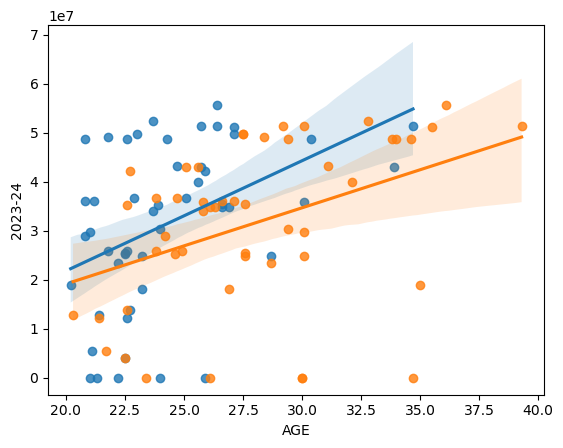

<Figure size 640x480 with 0 Axes>

In [163]:
#Sets all values of age and 2023-24 column to numeric
Player_and_Salary_top_50['AGE'] = pd.to_numeric(Player_and_Salary_top_50.loc[:,'AGE'], errors='coerce')
Player_and_Salary_top_50['2023-24'] = Player_and_Salary_top_50.loc[:,'2024-25'].astype(float)



#Display the correlation between PPG and salary and Age and salary. 
#Result showing the on average the older you are and the more points you score the high your salary is. 
Player_and_Salary_top_50.info()
sns.regplot(x='PPG',y='2023-24',\
           data = Player_and_Salary_top_50, label= 'Points per Game')
sns.regplot(x='AGE',y='2023-24',\
           data = Player_and_Salary_top_50, label = 'Age' )
plt.show()
plt.clf()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NAME     50 non-null     object 
 1   TEAM     50 non-null     object 
 2   PPG      50 non-null     float64
 3   AGE      50 non-null     float64
 4   2023-24  50 non-null     float64
 5   2024-25  50 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


/var/folders/yp/nnhfbx9n055106j0nvvkcwlr0000gn/T/ipykernel_51989/1404116792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50['2023-24'] = top_50['2023-24'].astype(float)


<Axes: xlabel='2024-25', ylabel='2023-24'>

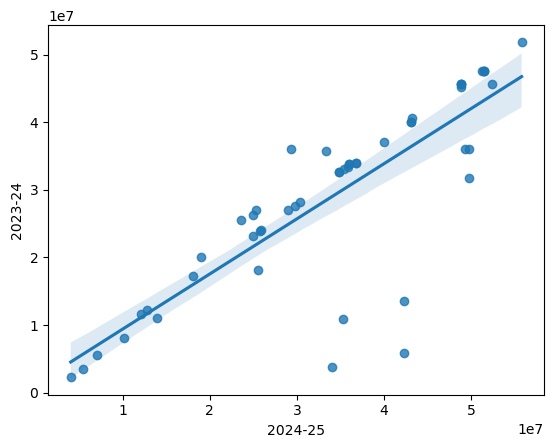

In [169]:
#Correlation between 202324 salary and 2024-25
Player_and_Salary_cleaned.head(15)


#Drop all players who dont have a contract in 2024-25
Player_and_Salary_DropZero = Player_and_Salary_cleaned[Player_and_Salary_cleaned['2024-25'] != 0].\
reset_index(drop = True)
#Retrieve Top 50 players
top_50 = Player_and_Salary_DropZero.iloc[:50]

top_50['2023-24'] = top_50['2023-24'].astype(float)

top_50.info()
sns.regplot(x = '2024-25', y = '2023-24', data = top_50)
#plt.scatter(x = 'NAME', y = '2024-25', data = Player_and_Salary_top_50)